<a href="https://colab.research.google.com/github/Shaik-pardi-11/Learn-How-to-Clean-and-Prepare-a-raw-data-for-ML/blob/main/Data_Cleaning_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dataset from the source.

# 1.Exploring Basic Info (nulls, data types)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Titanic-Dataset.csv")
df.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# **2.Handle missing values using mean/median/imputation.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [ ]:


df['Age'].fillna(df['Age'].median(), inplace=True)

df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna("Unknown", inplace=True)
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


#3.Convert categorical features into numerical using encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

df_encoded['Sex'] = le_sex.fit_transform(df_encoded['Sex'])
df_encoded['Embarked'] = le_embarked.fit_transform(df_encoded['Embarked'])

# 4.Normalize/standardize the numerical features.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv('/content/Titanic-Dataset.csv')
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns



min_max_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_cols] = min_max_scaler.fit_transform(df[numeric_cols])

standard_scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numeric_cols] = standard_scaler.fit_transform(df[numeric_cols])


#  5.Visualize outliers using boxplots and remove them.

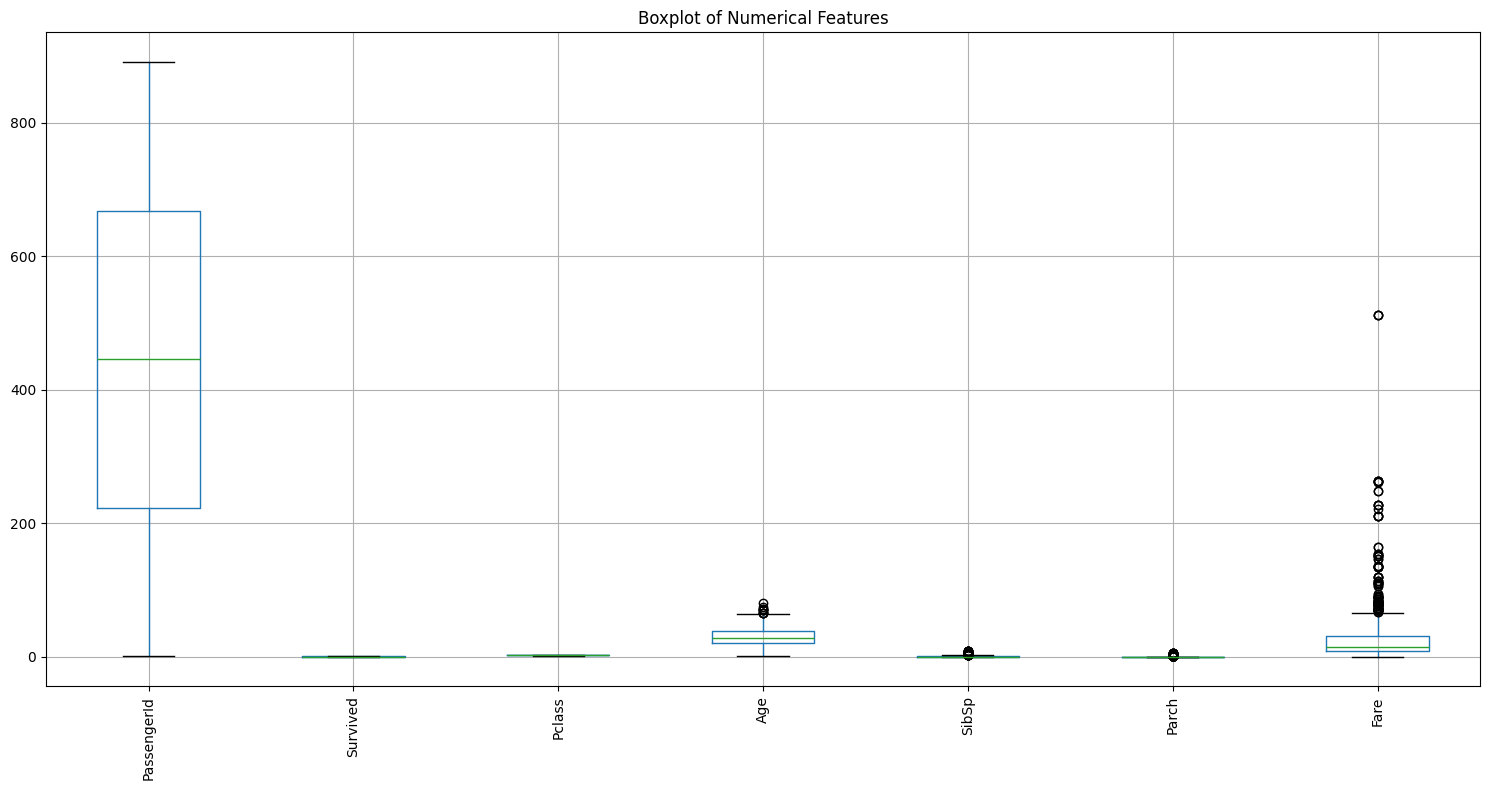

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Titanic-Dataset.csv')

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot()
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:

def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df_clean = remove_outliers_iqr(df.copy(), numeric_cols)

print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")

Original shape: (891, 12)
Cleaned shape: (436, 12)
